In [16]:
import uproot
import awkward as ak
import json

import statistics as st
import collections
from random import randint
#import visualkeras
from sklearn.metrics import mean_squared_error

#typical libraries
import matplotlib.pyplot as plt
import plotly
import pandas as pd
import numpy as np
import math

#import my own functions
from plot_histograms import plot_flash_time_distribution, sample_awkward_arrays, plot_variable_histograms


In [11]:
file_path = '/data/vidales/opana_tree_combined_v2609.root'
file = uproot.open(file_path)
optree = file['opanatree']['OpAnaTree'] # Tree con número de fotoelectrones
print("Keys in optree:", optree.keys())

Keys in optree: ['eventID', 'runID', 'subrunID', 'nuvX', 'nuvY', 'nuvZ', 'nuvT', 'nuvE', 'stepX', 'stepY', 'stepZ', 'stepT', 'dE', 'energydep', 'energydepX', 'energydepY', 'energydepZ', 'E', 'StartPx', 'StartPy', 'StartPz', 'EndPx', 'EndPy', 'EndPz', 'process', 'trackID', 'motherID', 'PDGcode', 'InTimeCosmics', 'InTimeCosmicsTime', 'dEtpc', 'dEpromx', 'dEpromy', 'dEpromz', 'dEspreadx', 'dEspready', 'dEspreadz', 'dElowedges', 'dEmaxedges', 'nopflash', 'flash_id', 'flash_time', 'flash_total_pe', 'flash_pe_v', 'flash_tpc', 'flash_y', 'flash_yerr', 'flash_z', 'flash_zerr', 'flash_x', 'flash_xerr', 'flash_ophit_time', 'flash_ophit_risetime', 'flash_ophit_starttime', 'flash_ophit_amp', 'flash_ophit_area', 'flash_ophit_width', 'flash_ophit_pe', 'flash_ophit_ch']


In [12]:
# Load variables to be predicted and associated data in a single step
hit_nuvT, hit_PE, hit_ch, hit_t = (optree[key].array() for key in ['nuvT', 'flash_ophit_pe', 'flash_ophit_ch', 'flash_ophit_time'])

Flash time distribution chosed is from [0us,2us] in opana_tree_combined_v2609 and opana_tree_combined_v2609_2. There's a peak in 10us. It probably require make another data set.

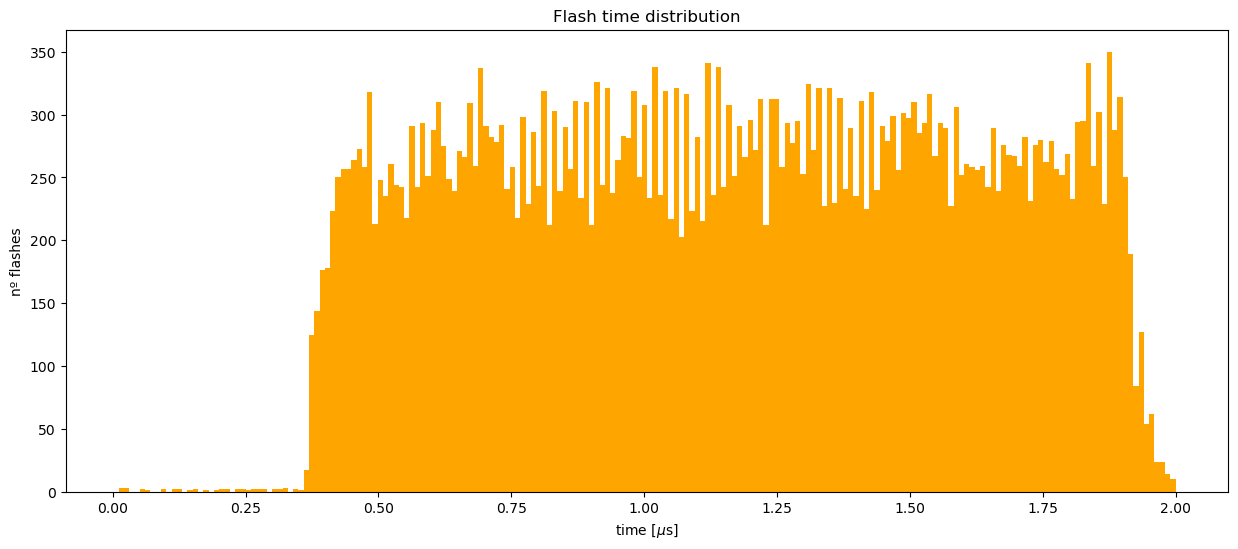

In [13]:
flash_time_flattened = ak.flatten(optree['flash_time'].array(), axis=None)
plot_flash_time_distribution(flash_time_flattened,bins=200)

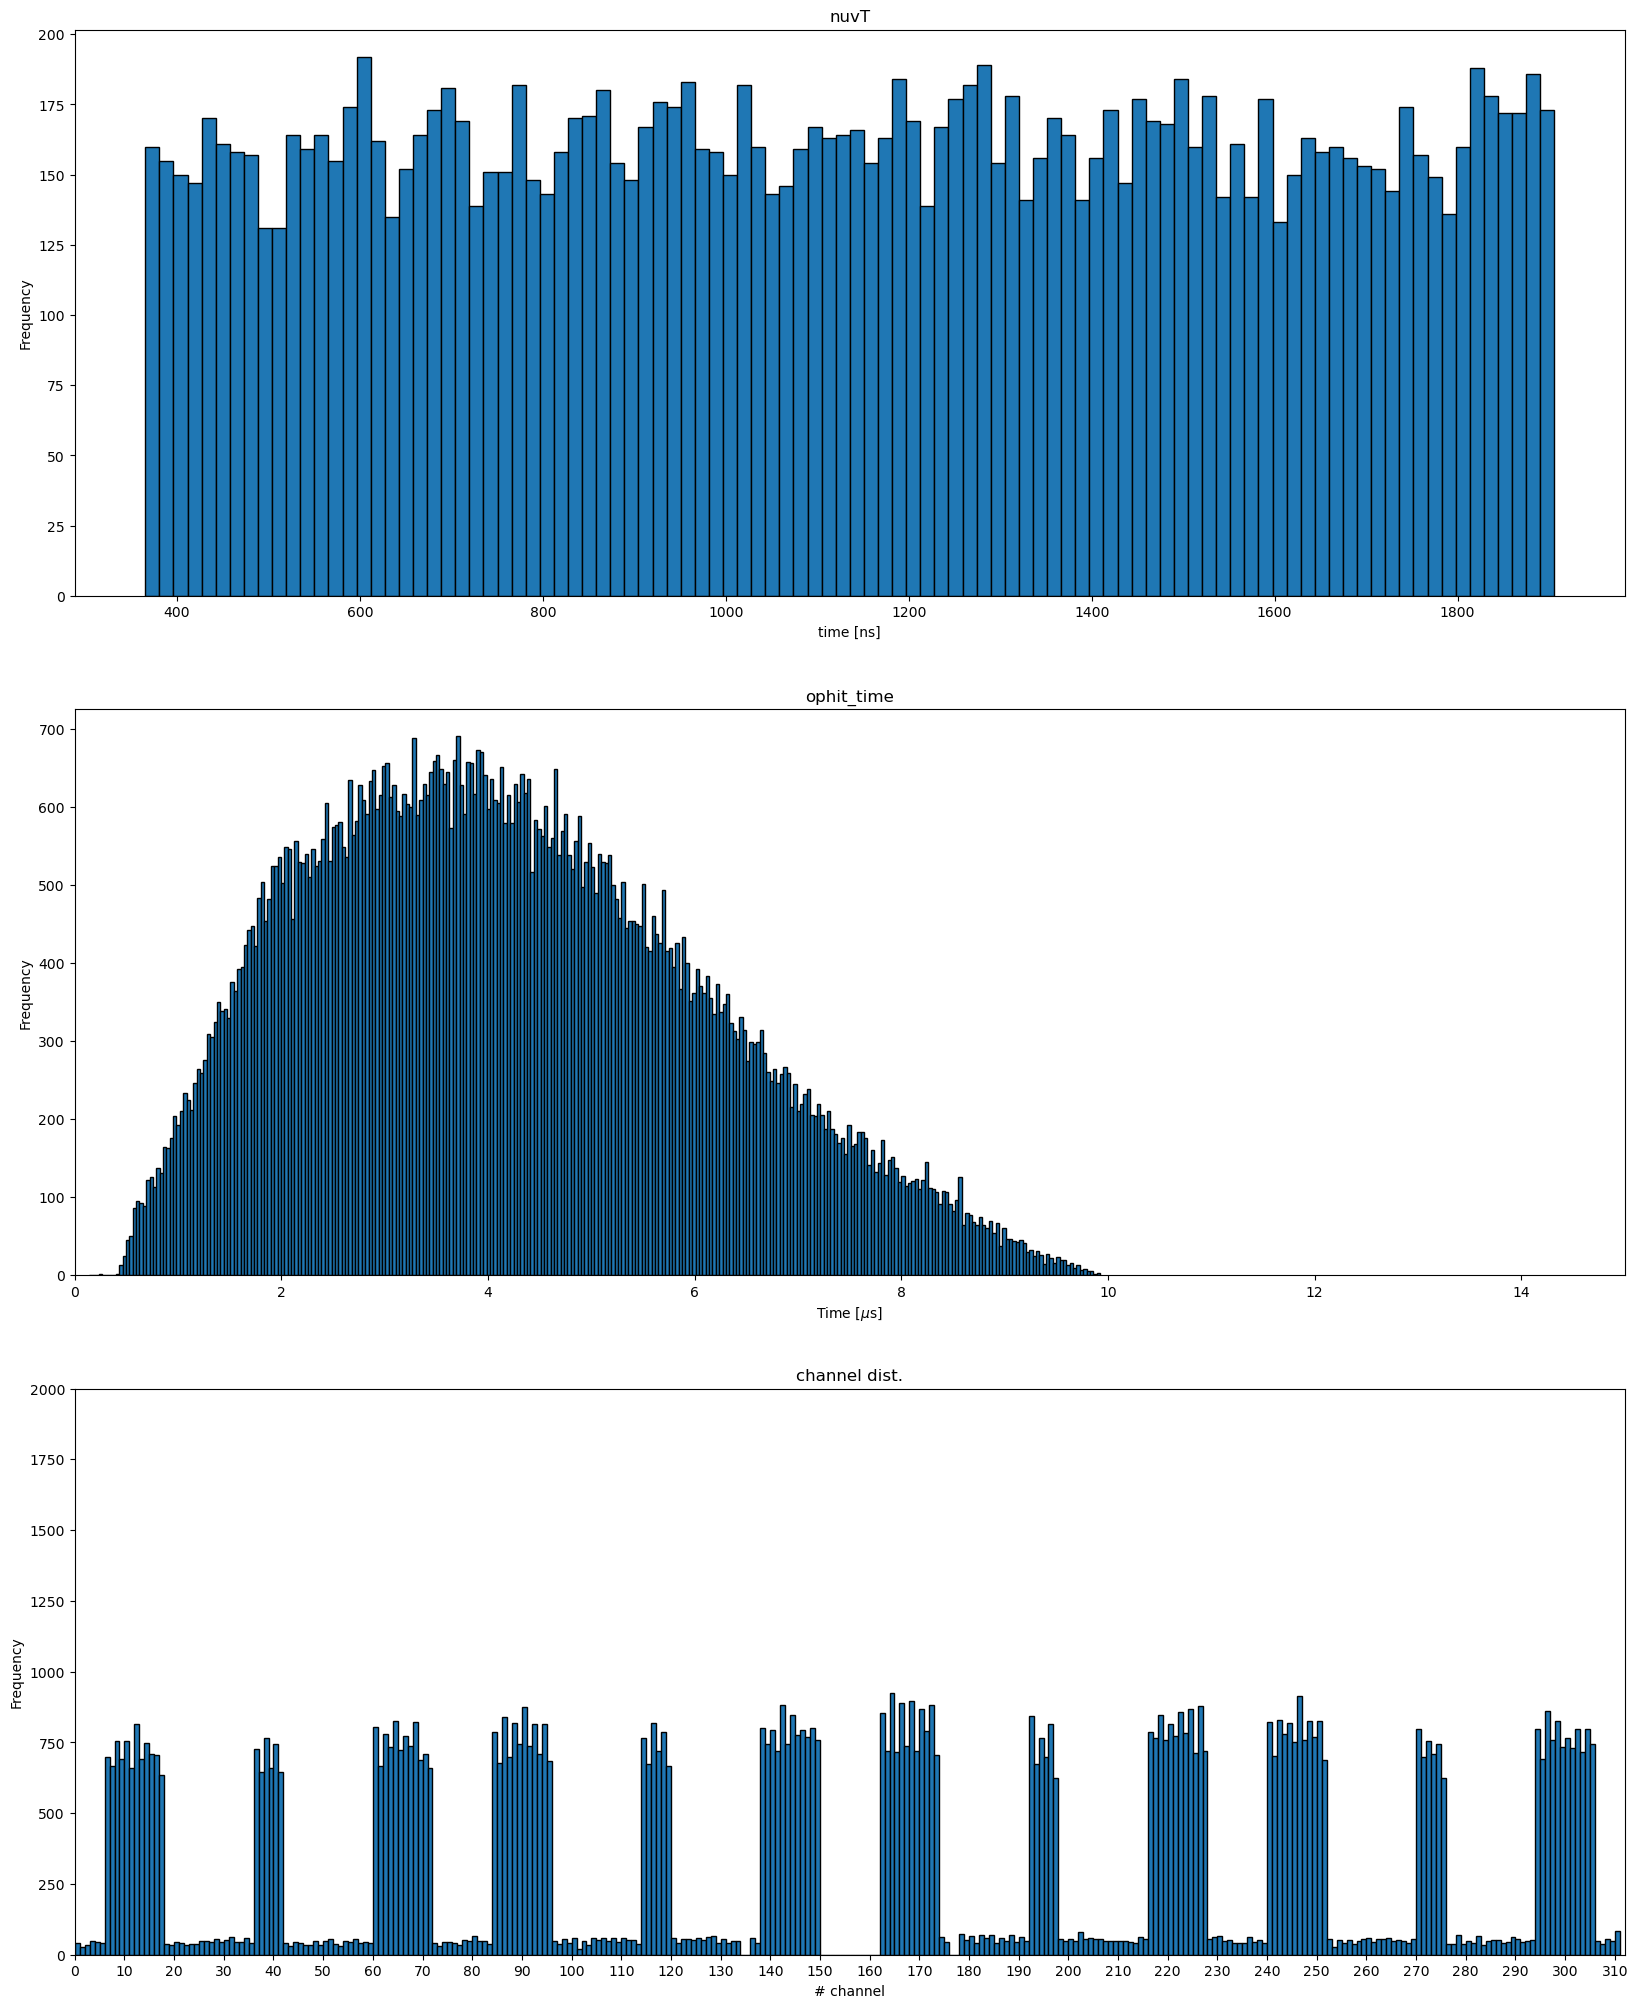

In [17]:
plot_variable_histograms(hit_nuvT, hit_t, hit_ch)